# <center>Facies Classification using Machine Learning</center>

![Facies Classification Image](https://s.wsj.net/public/resources/images/B3-AH098_Oil_P_20180502165608.jpg)

How do you classify facies in an oil well?

You look at the various acquired and derived well logs like Gamma ray, Porosity, Resistivity etc.

In this session, your task is to create a machine learning model which can classify the well facies based on other well log data.

Here, I will discuss the step by step approach to create a Machine Learning classification model in such scenarios. 

You can further use this notebook as a template to solve any supervised ML problem.

The steps involved to solve any ML Problem is listed below:

- <a href='#1'>Importing important libraries</a>
- <a href='#2'>Reading the data into python</a>
- <a href='#3'>Defining the problem statement</a>
- <a href='#4'>Looking at the frequency distribution of Target variable</a>
- <a href='#5'>Basic data exploration</a>
- <a href='#6'>Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)</a>
- <a href='#7'>Outlier treatment</a>
- <a href='#8'>Missing Values treatment</a>
- <a href='#9'>Feature Selection using Visual correlation analysis</a>
- <a href='#10'>Feature Selection using Statistical correlation analysis</a>
- <a href='#11'>Pre-processing of Data for ML</a>
- <a href='#12'>Splitting Data for Train-Test</a>
- <a href='#13'>Trying multiple ML algorithms</a>
- <a href='#14'>Selecting the best Model</a>
- <a href='#15'>Deploying the best model in production</a>

## <a id='1'>Importing Libraries</a>

In [1]:
import pandas as pd  # use to manipulate data in a dataframe and reading csv,excel files
import numpy as np  # use to do matrix and array operations in python
import os
import matplotlib.pyplot as plt # for visualising data
import seaborn as sns
# to create plots which are embedded in the notebook
%matplotlib inline   
from scipy.stats import f_oneway  # function used for ANOVA test 
import sklearn #for applying machine algorithms
import flask #for hosting python API as web-service
import pickle #for storing python objects in files

If there is problem in importing any library run <b>'!pip install library_name'</b> in another cell replacing library_name with the name of the library.

## <a id='2'>Reading the data into python</a>

This is one of the most crucial steps in machine learning! You must try to understand the data and it's domain first, before applying any machine learning algorithm.

In 1986, Alberta Geological Survey(AGS) began a project to map the McMurray Formation and the overlying Wabiskaw Member of the Clearwater Formation in the Athabasca Oil Sands Area. The data that we are using for this case study is one one of the most significant products of the project. The dataset has been taken from this <a href= 'https://ags.aer.ca/publication/spe-006'>website</a>.

The data has one file ".csv". This file contains well log data from 2175 wells.

You can download the data required for this case study <a href='https://slb001-my.sharepoint.com/:f:/g/personal/sminocha_slb_com/EioWwV6vUuBLkPibEe6i8akByqZS6vk52OXvXWhy2x-Bow?e=2YRI3M'> here </a>

![Image of Athabasca](https://static.aer.ca/prd/images/content/Media-Centre/Figure-R2.4-CanadaAoAs-2021-KB.jpg)

#### Data Description

The domain meaning of each column in the data is as mentioned below:

- SitID    : Unique well identifier
- Depth    : Depth at which the well measurements are taken
- Lith_id  : Code to identify the lithology
            0	Undefined
            1	Sand
            2	ShalySand
            3	SandyShale
            4	Shale
            5	Coal
            6	CementedSand
- W_Tar   : Mass percent bitumen
- VSH     : Volume of Shale 
- PHI     : Porosity of formation
- RW      : Water resistivity at formation temperature

In [2]:
#### Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
#### Reading data from the csv file
well_log_df=pd.read_csv("INTELLOG.csv")
print('Shape of the data:', well_log_df.shape)

#### Checking for duplicate rows and delete them if any
if(well_log_df.duplicated().sum()>0):      
    well_log_df=well_log_df.drop_duplicates()
    print('Shape After deleting duplicate values:', well_log_df.shape)

#### Printing sample data
#### Start observing the Quantitative/Categorical(Nominal/Ordinal)/Qualitative variables
well_log_df.head(10)

Shape of the data: (579846, 8)


,SitID,DEPTH,Lith_id,W_Tar,SW,VSH,PHI,RW
0,102496,437.00,5,0.0,1.0,1.000,0.000,1.054
1,102496,437.25,5,0.0,1.0,0.956,0.016,1.054
2,102496,437.50,5,0.0,1.0,0.776,0.083,1.054
3,102496,437.75,4,0.0,1.0,0.583,0.154,1.054
4,102496,438.00,2,0.0,1.0,0.383,0.228,1.054
5,102496,438.25,2,0.0,1.0,0.489,0.189,1.053
6,102496,438.50,4,0.0,1.0,0.552,0.166,1.053
7,102496,438.75,2,0.0,1.0,0.450,0.204,1.053
8,102496,439.00,2,0.0,1.0,0.395,0.224,1.053
9,102496,439.25,2,0.0,1.0,0.372,0.232,1.053


## <a id='3'> Defining the Problem Statement </a>

<b> Create a Machine Learning model to identify the lithology code (Lith_id) for well log data </b>
- Target Variable : Lith_id
- Predictors : Depth, SW, VSH etc.

As the target variable is a categorical(nominal) feature, we need to create a supervised ML classifier.

## <a id='4'>Looking at the frequency distribution of Target variable</a>

- If there are classes for which the trainng set doesn't have adequate data rows, the model will not be able to learn some particular scenarios. Our model will be biased for those classes which have higher number of data rows.
- Imbalanced classification is the problem of classification when there is an unequal distribution of classes in the training dataset.
- The distribution can vary from a slight bias to a severe imbalance where there is one example in the minority class for hundreds, thousands, or millions of examples in the majority class or classes.

- Slight Imbalance- An imbalanced classification problem where the distribution of examples is uneven by a small amount in the training dataset (e.g. 4:6).
- Severe Imbalance- An imbalanced classification problem where the distribution of examples is uneven by a large amount in the training dataset (e.g. 1:100 or more).


<AxesSubplot:>

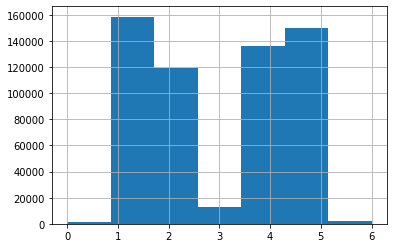

In [4]:
#### Plotting histogram of the target variable 
well_log_df['Lith_id'].hist(bins=7)

In [5]:
#### Looking at the value count of unique values in target variable
well_log_df['Lith_id'].value_counts()

1    158516
5    149757
4    135740
2    119512
3     12898
6      1769
0      1654
Name: Lith_id, dtype: int64

In this case, classes 0, 6 and 3 are minority classes. Since, none of these classes is of utmost important to classify. If it would have been important classes to classify, we could have used techniques of imbalanced classification. In this case we can club all the minority classes to make one majority class and label them as 'Others'. 

In [6]:
#### Merging class labels 0,3,6 into 3. 
well_log_df['Lith_id_new']=well_log_df['Lith_id'].replace([0,3,6],[3,3,3])

<AxesSubplot:>

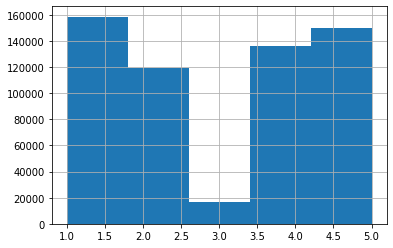

In [7]:
#### Plotting histogram of the target variable 
well_log_df['Lith_id_new'].hist(bins=5)

This makes the imbalanced ratio less severe. We have now 5 classes as follows:
        
        1	Sand
        2	ShalySand
        3	Other
        4	Shale
        5	Coal

## <a id='5'>Basic Data Exploration</a>

This step is performed to guage the overall data. It's volume, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to move ahead with the column rejection process. Try to look at each column carefully and ask, does this column affect the class label of the Target variable? For example in this case, you would like to ask yourself, does this column affects the lithology present? If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python

    - head() : This helps to see a few sample rows of the data
    - info() : This provides the summarized information of the data
    - describe() : This provides the descriptive statistical details of the data
    - nunique(): This helps us to identify if a column is categorical or continuous


In [8]:
#### Looking at sample rows in the data
well_log_df.head()

,SitID,DEPTH,Lith_id,W_Tar,SW,VSH,PHI,RW,Lith_id_new
0,102496,437.00,5,0.0,1.0,1.000,0.000,1.054,5
1,102496,437.25,5,0.0,1.0,0.956,0.016,1.054,5
2,102496,437.50,5,0.0,1.0,0.776,0.083,1.054,5
3,102496,437.75,4,0.0,1.0,0.583,0.154,1.054,4
4,102496,438.00,2,0.0,1.0,0.383,0.228,1.054,2


In [9]:
#### Observing the summarized information of data
#### Data types, Missing values based on number of non-null values Vs total rows etc.
#### Remove those variables from data which have too many missing values (Missing Values > 30%)
well_log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579846 entries, 0 to 579845
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SitID        579846 non-null  int64  
 1   DEPTH        579846 non-null  float64
 2   Lith_id      579846 non-null  int64  
 3   W_Tar        579846 non-null  float64
 4   SW           579846 non-null  float64
 5   VSH          579846 non-null  float64
 6   PHI          579846 non-null  float64
 7   RW           579846 non-null  object 
 8   Lith_id_new  579846 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 39.8+ MB


RW is not a categorical variable. Instead it should be considered as float. It means we need to convert the data type and the again look for the summarized info

In [11]:
#### Converting Object type or string type to Float or int type in pandas
''' Always try to execute below command first without the errors argument so that you can get to 
    know what is making it's data type as object '''

well_log_df['RW']=pd.to_numeric(well_log_df['RW'],errors='coerce')

In [12]:
#### Observing the summarized information of data
well_log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579846 entries, 0 to 579845
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SitID        579846 non-null  int64  
 1   DEPTH        579846 non-null  float64
 2   Lith_id      579846 non-null  int64  
 3   W_Tar        579846 non-null  float64
 4   SW           579846 non-null  float64
 5   VSH          579846 non-null  float64
 6   PHI          579846 non-null  float64
 7   RW           564035 non-null  float64
 8   Lith_id_new  579846 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 39.8 MB


RW is the only column having missing values, which are quite few.

In [13]:
#### Showing the descriptive statistics of the data
well_log_df.describe(include='all')

,SitID,DEPTH,Lith_id,W_Tar,SW,VSH,PHI,RW,Lith_id_new
count,579846.000000,579846.000000,579846.000000,579846.000000,579846.000000,579846.000000,579846.000000,564035.000000,579846.000000
mean,119191.947886,381.550537,2.998370,0.008972,0.778169,0.482571,0.170572,0.701235,2.997775
std,17010.229729,169.285127,1.618618,0.136901,0.293630,0.280934,0.104686,1.343255,1.602121
min,102496.000000,0.000000,0.000000,-1.167000,0.000000,0.000000,0.000000,-3.760000,1.000000
25%,108693.000000,247.940000,1.000000,0.000000,0.554000,0.250000,0.087000,0.509000,1.000000
50%,112994.000000,426.570000,3.000000,0.000000,1.000000,0.488000,0.163000,0.628000,3.000000
75%,122505.000000,494.750000,5.000000,0.036000,1.000000,0.704000,0.255000,0.764000,5.000000
max,184130.000000,960.040000,6.000000,0.184000,1.000000,1.000000,0.471000,114.300000,5.000000


In [14]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
well_log_df.nunique()

SitID           2175
DEPTH          57186
Lith_id            7
W_Tar            505
SW               962
VSH             1001
PHI              437
RW              4924
Lith_id_new        5
dtype: int64

All predictor variables are continuous.

#### Basic Data Exploration Results

Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regarding each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created

    Lith_id_new: Categorical. Selected. This is the Target Variable!
    SitID: Categorical. Not Selected. (Though it affects Lith_id_new, we won't be having any data for new SitID.) 
    DEPTH: Continuous. Selected.
    W_Tar: Continuous. Selected.
    SW: Continuous. Selected.
    VSH: Continuous. Selected.
    PHI: Continuous. Selected.
    RW: Continuous. Selected.
    Lith_id: Categorical. Not Selected. (It's the older version of Lith_id)


## <a id='6'>Visual Exploratory Data Analysis</a>

Plot 
- Bar plots for categorical variables
- Histogram for continuous variables

### Visualising Continuous Variables using Histograms

All the predictor variables that we have are continuous.

array([[<AxesSubplot:title={'center':'DEPTH'}>,
        <AxesSubplot:title={'center':'W_Tar'}>],
       [<AxesSubplot:title={'center':'SW'}>,
        <AxesSubplot:title={'center':'VSH'}>],
       [<AxesSubplot:title={'center':'PHI'}>,
        <AxesSubplot:title={'center':'RW'}>]], dtype=object)

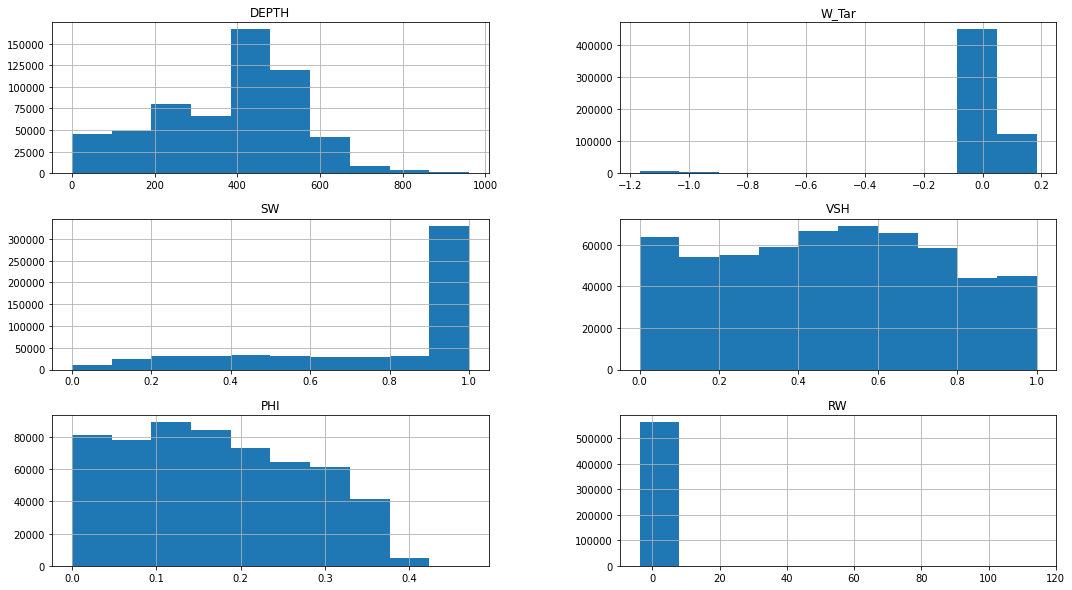

In [15]:
#### Plotting histograms of multiple columns together
well_log_df.hist(['DEPTH','W_Tar','SW','VSH','PHI','RW'], figsize=(18,10))

###  Interpretation

Histogram sows us the data distribution for a single continuous variable.
 
The X-axis shows the range of values and Y-axis represent the number of values in that range.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

<b>Selected Continuous Variables:</b>

   - <b> DEPTH </b> : Selected. The distribution is good.
   - <b>W_Tar</b> : Seleced. The distribution is good. There are some outliers lying in negative range, need to treat them.
   - <b>SW</b> : Selected. The distribution is good.
   - <b>PHI</b> : Selected. The distribution is good.
   - <b>VSH</b> : Selected. The distribution is good.
   - <b>RW</b> : Selected. Can't say whether the distribution is good or not. But it's ok. Outliers are there beyond 10 which are hardly visible in the histogram, need to treat them. Also, since it's resistivity, we need to log transform the values. One more thing, there are some negative values for RW which needs to be treated.


## <a id='7'>Outlier Treatment</a>

Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram. 

Outlier must be treated separately for every column. As the treatment will be slightly different for each column.

<b>Why I should treat the outliers? </b>

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are two ways to treat outliers in a column.

    1st way: Delete the outlier rows. Only if there are just few rows lost as compared to total number of rows.
    2nd way: Impute the outlier values with a logical business value

<b> W_Tar Column </b> <br>
Let's first consider the W_Tar column. As, you can see there are negative values of mass percentage of bitumen which is not possible. This might have occured due to some calibration error. So let's add some constant value say 2% in the whole column as it's only the relative values which will matter and then count the number of outliers. After adding 2, I am considering anything less than 1.9 to be an outlier. Since it's the relative value that matters, we just need to give it a value less than other values in the column. So, let's give it 1.9 so that the distribution doesn't go extreme. You may decide to delete these 1.53% rows as it's a small fraction of rows.

In [16]:
#### Calculating number of outliers for W_Tar
well_log_df['W_Tar_calibrated']=well_log_df['W_Tar']+2
print('Percentage of rows having outlier values is ',len(well_log_df[well_log_df['W_Tar_calibrated']<1.9])/len(well_log_df)*100)

Percentage of rows having outlier values is  1.5378221113881962


In [17]:
#### Replacing the value of outliers for W_Tar with 1.9.
well_log_df['W_Tar_calibrated']=well_log_df['W_Tar_calibrated'].where(well_log_df['W_Tar_calibrated']>=1.9,1.9)

Let's visualize the distribution again after outlier treatment.

<AxesSubplot:>

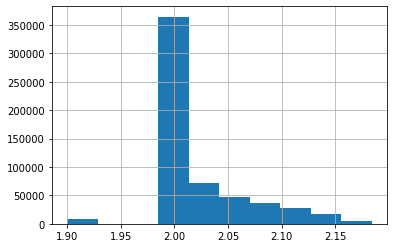

In [18]:
#### Plotting histogram of W_Tar_Calibrated
well_log_df['W_Tar_calibrated'].hist()

The distribution seems much better now, leaving the business meaning of the variable as intact.

<b>RW Column</b> <br>
Since resistivity can not be negative. The reason it's negative is might be due to the negative potential difference caused by the reverse of electrodes. So we should consider taking the absolute value of the Rw.
Also, we need to log transform the resistivity as it's range varies on a log scale.

In [19]:
#### Taking absolute of RW
well_log_df['RW_log']=abs(well_log_df['RW'])
print('The minimum positive value of RW is ',well_log_df[well_log_df['RW_log']!=0]['RW_log'].min())

The minimum positive value of RW is  0.076


We also need to check, why the value of RW is zero at some places. Since the log value of 0 is negative infinity, we need to replace the value of 0 with some low positive RW value. The minimum value is 0.076, we can replace it with some value like 0.07.

In [20]:
#### Checking rows with RW_log=0
well_log_df[well_log_df['RW_log']==0]

,SitID,DEPTH,Lith_id,W_Tar,SW,VSH,PHI,RW,Lith_id_new,W_Tar_calibrated,RW_log
37403,104751,383.09,0,0.0,0.0,0.000,0.000,0.0,3,2.0,0.0
37404,104751,383.34,0,0.0,0.0,0.000,0.000,0.0,3,2.0,0.0
80933,106635,480.00,4,0.0,1.0,0.669,0.088,0.0,4,2.0,0.0
80934,106635,480.25,4,0.0,1.0,0.617,0.071,0.0,4,2.0,0.0
80935,106635,480.50,4,0.0,1.0,0.505,0.082,0.0,4,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
437065,122903,100.49,0,0.0,0.0,0.000,0.000,0.0,3,2.0,0.0
562425,165065,130.35,0,0.0,0.0,0.000,0.000,0.0,3,2.0,0.0
562426,165065,130.60,0,0.0,0.0,0.000,0.000,0.0,3,2.0,0.0
562427,165065,130.85,0,0.0,0.0,0.000,0.000,0.0,3,2.0,0.0


Mostly rows have all the missing values for W_Tar,SW,VSH,PHI and that's why their Lith_id is 0 i.e. undefined. So the model should probably learn that and we don't need to remove these rows.

In [21]:
#### Replacing value of RW_log = 0 with 0.07 and taking log base 10
well_log_df['RW_log']=np.log10(well_log_df['RW_log'].replace(0,0.07))

<AxesSubplot:>

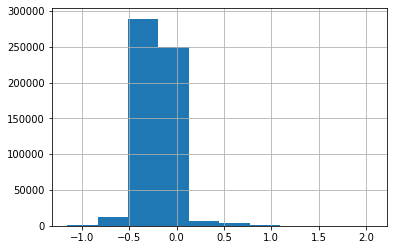

In [22]:
#### Plotting histogram of W_Tar_Calibrated
well_log_df['RW_log'].hist()

The distribution now seems much better than before.

## <a id='8'> Treatment of Missing Values </a>

Missing values of every column should be treated separately.

If a column has more than 30% data missing, then that column must be rejected because too much information is missing. There is no point of treating missing values for such a large amount of data.

There are below options for treating missing values in data.

   - Delete the missing value rows if there are only few records
   - Impute the missing values with MEDIAN or MEAN value for continuous variables
   - Impute the missing values with MODE value for categorical variables
   - nterpolate the values based on nearby values
   - Interpolate the values based on business logic
   
Let's see which columns has missing values in this case.


In [23]:
#### Finding how many missing values are there for every column
well_log_df.isnull().sum()

SitID                   0
DEPTH                   0
Lith_id                 0
W_Tar                   0
SW                      0
VSH                     0
PHI                     0
RW                  15811
Lith_id_new             0
W_Tar_calibrated        0
RW_log              15811
dtype: int64

In [24]:
#### Having a look at some rows out of these 15811. 
well_log_df[well_log_df['RW_log'].isnull()]

,SitID,DEPTH,Lith_id,W_Tar,SW,VSH,PHI,RW,Lith_id_new,W_Tar_calibrated,RW_log
52895,105794,482.28,5,0.012,0.677,0.774,0.086,NaN,5,2.012,NaN
52896,105794,482.53,1,0.000,1.000,0.000,0.199,NaN,1,2.000,NaN
52897,105794,482.78,3,0.000,1.000,0.000,0.169,NaN,3,2.000,NaN
52898,105794,483.03,3,0.009,0.878,0.000,0.179,NaN,3,2.009,NaN
52899,105796,460.00,5,0.005,0.763,0.867,0.050,NaN,5,2.005,NaN
...,...,...,...,...,...,...,...,...,...,...,...
561430,164968,260.00,5,0.000,1.000,0.779,0.084,NaN,5,2.000,NaN
561589,165028,239.25,5,0.000,1.000,0.708,0.111,NaN,5,2.000,NaN
561590,165028,239.50,4,0.000,1.000,0.692,0.117,NaN,4,2.000,NaN
561591,165028,239.75,4,0.000,1.000,0.680,0.121,NaN,4,2.000,NaN


There doesn't seem to be some kind of pattern or particular lithology where RW is missing. But we can see there are continuous rows, where the RW value is missing. So, it won't be a correct way to fill missing values based on nearby rows. I would like to fill the missing values based on the mean of resistivity values based on lithology.

In [25]:
#### Imputing mean of resitivity values based on lithology
for i in range(7):
    well_log_df['RW_log'].where((well_log_df['RW_log'].notna()) | (well_log_df['Lith_id']!=i),
                                                  well_log_df[well_log_df['Lith_id']==i]['RW_log'].mean(),
                                                          inplace=True)

In [26]:
#### Finding how many missing values are there for every column
well_log_df.isnull().sum()

SitID                   0
DEPTH                   0
Lith_id                 0
W_Tar                   0
SW                      0
VSH                     0
PHI                     0
RW                  15811
Lith_id_new             0
W_Tar_calibrated        0
RW_log                  0
dtype: int64

## <a id='9'>Feature Selection</a>

Now let's choose the best columns/features which are correlated to the Target variable. We can do this directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always advisab;e to visualize the relation between the Target variable and each of the predictors through some plots, to get a better sense of data.

We can use the below mentioned techniques for visualizing relationship between two variables as well as measuring the strength statistically.

<b> Visual exploration of relation between variables </b>
- Continuous Vs Continuous -----> Scatter Plot
- Categorical Vs Continuous -----> Box Plot
- Categorical Vs Categorical -----> Grouped Bar Plots

<b> Statistical relation strength between variables </b>
- Continuous Vs Continuous ------> Correlation Matrix
- Categorical Vs Continuous ------> ANOVA test
- Categorical Vs Categorical ------> Chi-Square Test

In this case, the target variable is categorical and all the predictors are continuous. So, we will use box plot for visualisation and ANOVA test for measuring relationship strength. 

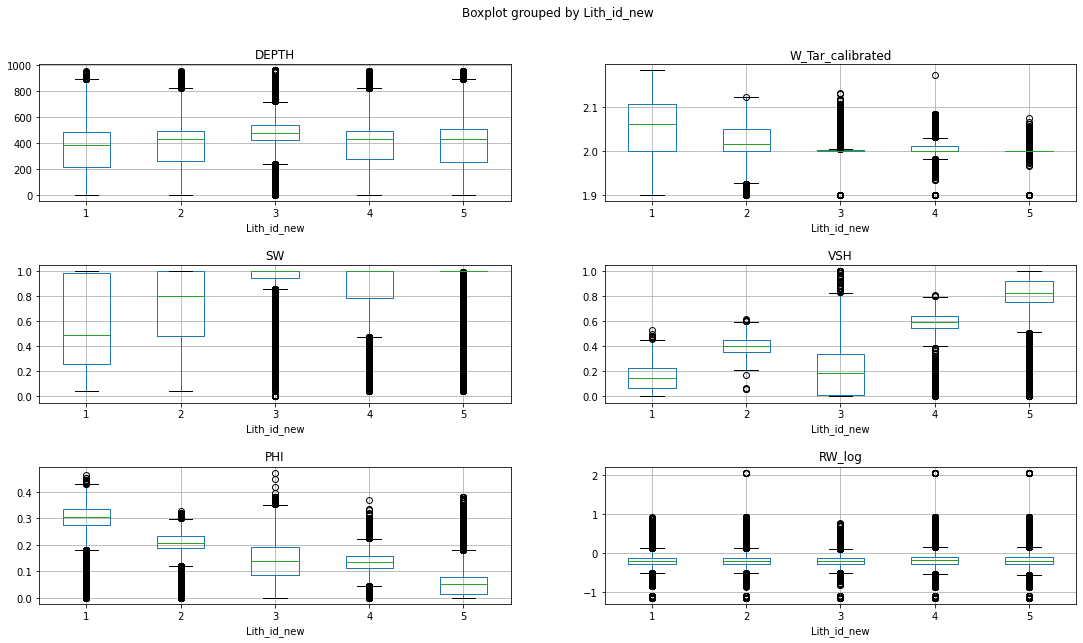

In [27]:
#### Creating Box plots for Categorical Target Variable "Lith_id_new" and continuous predictors
# Continuous columns list
ContinuousCols=['DEPTH', 'W_Tar_calibrated', 'SW', 'VSH', 'PHI', 'RW_log']

# Creating subplots
fig, PlotCanvas=plt.subplots(nrows=3, ncols=2, figsize=(18,10))
fig.tight_layout(pad=5.0)

# Plotting the boxplots in the subplots 
for PredictorCol , i in zip(ContinuousCols, range(len(ContinuousCols))):
    well_log_df.boxplot(column=PredictorCol, by='Lith_id_new', figsize=(5,5), vert=True, ax=PlotCanvas[int(i/2)][int(i%2)])

### Interpretation

<b>What should We exactly look for in the above box plots?</b>

These plots give an idea about how the data of continuous predictor is distributed in the Y-axis for each of the category on the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!), it indicates that these variables might be correlated with the target variable.

In this case, all the continuous predictors looks correlated with the Target variable except "RW_log".'RW_log' seems to be not correlated to the target variable.

Let's confirm our interpretation by looking at the results of ANOVA test.

### <a id='10'> Statistical Feature Selection using ANOVA Test (Categorical Vs Continuous)</a>

Analysis of variance(ANOVA) is performed to check if there exists any relationship between the given continuous and categorical variable

   - Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric continuous predictor variable is same for all the groups in the categorical Target variable)
   - ANOVA Test result: Probability of H0 being true

So, we will select those features which have less than 5% probability of having no relation with the Target variable.

The total variation in the dependent variable (the outcome we care about (i.e. lithology) can be decomposed into the variation between classes (lithologies) and the variation within classes (lithologies). When the within-class variation is small relative to the between-class variation, your classification scheme will be meaningful.

<b> F-statistic </b>= <u>Variation among diferent lithologies</u>
<br>  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Variation within each lthology  
                      

In [28]:
#### Defining a function to find the statistical relationship with all the continuous variables

def AnovaTest(inputDataframe, TargetVariable, PredictorList):

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in PredictorList:
        CategoryGroupLists=inputDataframe.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.01):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults)
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults)
    
    return(SelectedPredictors)

In [29]:
#### Calling the function to check which categorical variables are correlated with target

AnovaTest(inputDataframe=well_log_df, 
              TargetVariable='Lith_id_new', 
              PredictorList=ContinuousCols)

##### ANOVA Results ##### 

DEPTH is correlated with Lith_id_new | P-Value: F_onewayResult(statistic=2579.3289129072946, pvalue=0.0)
W_Tar_calibrated is correlated with Lith_id_new | P-Value: F_onewayResult(statistic=54636.08113060157, pvalue=0.0)
SW is correlated with Lith_id_new | P-Value: F_onewayResult(statistic=52815.22320192453, pvalue=0.0)
VSH is correlated with Lith_id_new | P-Value: F_onewayResult(statistic=1136355.8444733869, pvalue=0.0)
PHI is correlated with Lith_id_new | P-Value: F_onewayResult(statistic=678903.3342670002, pvalue=0.0)
RW_log is correlated with Lith_id_new | P-Value: F_onewayResult(statistic=50.6063436810309, pvalue=1.150572383397399e-42)


['DEPTH', 'W_Tar_calibrated', 'SW', 'VSH', 'PHI', 'RW_log']

Looking at the ANOVA results we got to know every variable is correlated with 'Lith_id_new' including 'RW_log'. Though it is definetely the least correlated feature. F-statistic somehow gives an idea how much is the correlation between categorical variable and continuous target variable. Clearly, VSH is the highest correlated feature and that we know by domain knowledge as well.

## Selecting final predictors for Machine Learning

Based on the above analysis, we can select the final predictors for machine learning. I will select 'SitID' just for splitting into train-test later on and I will not be using it for model training.

In [30]:
Selected_Columns=['DEPTH','W_Tar_calibrated','SW','VSH', 'PHI', 'RW_log']

# Selecting final columns
FinalData=well_log_df[Selected_Columns]
FinalData.head()

,DEPTH,W_Tar_calibrated,SW,VSH,PHI,RW_log
0,437.00,2.0,1.0,1.000,0.000,0.022841
1,437.25,2.0,1.0,0.956,0.016,0.022841
2,437.50,2.0,1.0,0.776,0.083,0.022841
3,437.75,2.0,1.0,0.583,0.154,0.022841
4,438.00,2.0,1.0,0.383,0.228,0.022841


## <a id='11'>Data Pre-processing for Machine Learning</a>

The following List of steps is generally performed on predictor variables before data can be used for machine learning.

    1. Converting each Ordinal Categorical columns to numeric
    2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
    3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
    4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In this data, we have no Ordinal/nominal categorical variable which is in string format.


## <a id='12'>Splitting data into Training and Testing</a>

We will not use the full data for creating the model. Some data is kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Generally, 70-80% of data is randomly selected as Training data and the rest 30-20% is used as Tesing data.

But in this case we want to have our testing data come from some particular wells as we would later like to test the model on complete well data for some wells. So we will randomly select 3-4 wells for testing. 

In [31]:
#### Calculating No. of wells
print('No. of wells are',well_log_df['SitID'].nunique())

No. of wells are 2175


In [32]:
#### Data rows well-wise
well_log_df['SitID'].value_counts()

154453    669
114305    613
108617    609
110325    581
113795    573
         ... 
117299     59
117292     49
118232     40
113879     38
118236     25
Name: SitID, Length: 2175, dtype: int64

In [33]:
#### Test wells SitID. You can choose any well id as you wish.
test_wells=[110325,117299,114305,113795] 

In [34]:
#### Separate Target Variable and Predictor Variables
TargetVariable='Lith_id_new'
Predictors=['DEPTH', 'W_Tar_calibrated', 'SW', 'VSH', 'PHI', 'RW_log']

#### Split the data into training and testing set
X_train=well_log_df[~well_log_df.SitID.isin(test_wells)][Predictors]
y_train=well_log_df[~well_log_df.SitID.isin(test_wells)][TargetVariable]
X_test=well_log_df[well_log_df.SitID.isin(test_wells)][Predictors]
y_test=well_log_df[well_log_df.SitID.isin(test_wells)][TargetVariable]
X_test_wellnames=well_log_df[well_log_df.SitID.isin(test_wells)]['SitID']

## Standardization/Normalization of data

This step is optional and you can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.

However, if you are using KNN, SVM or Neural Networks, then this step becomes necessary.

I am skipping this step as I am not using any of the above mentioned algorithms

In [35]:
#### Sandardization of data 
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
## Choose between standardization and MinMAx normalization

#PredictorScaler=StandardScaler()
#PredictorScaler=MinMaxScaler()

## Storing the fit object for later reference
#PredictorScalerFit=PredictorScaler.fit(X_train)

## Generating the standardized values of X
#X_train=PredictorScalerFit.transform(X_train)
#X_test=PredictorScalerFit.transform(X_test)

In [36]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(578020, 6)
(578020,)
(1826, 6)
(1826,)


## <a id='13'> Logistic Regression </a>

LogisticRegression(multi_class='multinomial', random_state=22)
Accuracy score for training data: 0.7205114009895851


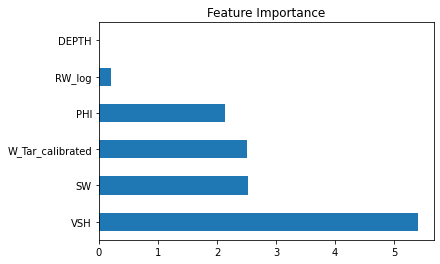


##### Model Validation and Accuracy Calculations ##########

Accuracy score for testing data: 0.6686746987951807

Accuracy score for each class in testing data:
Accuracy score for lithology label  4  is  0.5563725490196079
Accuracy score for lithology label  5  is  0.9893992932862191
Accuracy score for lithology label  2  is  0.2690909090909091
Accuracy score for lithology label  1  is  0.6440071556350626
Accuracy score for lithology label  3  is  0.0


In [37]:
#### Linear Classification Algorithm : Logistic Regression

from sklearn.linear_model import LogisticRegression

# Create a Random Forest Classifier instance with suitable parameters
ClfModel = LogisticRegression(multi_class='multinomial',max_iter=100,random_state=22)

# Printing all the parameters of Random Forest
print(ClfModel)

# Creating the model on Training Data
LR=ClfModel.fit(X_train,y_train)
prediction=LR.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('Accuracy score for training data:',metrics.accuracy_score(y_train, LR.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns for each class label
feature_importances = pd.Series(abs(LR.coef_).mean(axis=0), index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Putting predicted values along with the predictors and actual target values
TestDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestDataResults[TargetVariable]=y_test
TestDataResults[('Predicted_'+TargetVariable)]=prediction
TestDataResults['SitID']=X_test_wellnames

# Calculating accuracy for Test Data
print('\nAccuracy score for testing data:',metrics.accuracy_score(TestDataResults[TargetVariable],
                                                                 TestDataResults['Predicted_'+TargetVariable]))

# Calculating accuray for each class in Test Data
print('\nAccuracy score for each class in testing data:')

for lithology_class in TestDataResults[TargetVariable].unique():
    print('Accuracy score for lithology label ',lithology_class,' is ',
                  metrics.accuracy_score(TestDataResults[TestDataResults[TargetVariable]==lithology_class][TargetVariable],
                                TestDataResults[TestDataResults[TargetVariable]==lithology_class]['Predicted_'+TargetVariable]))

In [38]:
#### Saving Test data results
TestDataResults.to_csv("LR_TestDataResults.csv")
lr_testresults=TestDataResults.copy()

A simple linear algorithm gives 66.8% accuarcy, which is neither bad nor good. We can say it's just okay. But it gives an idea that the dependence of target variables is not simply a linear one. Also, low accuracy is due to less iterations and no class weights for imbalanced data. If we make 'max_iter' parameter in the above code to 300, it will give an accuracy of 85% on testing data. You can try it by your own later on as it may take time to train model with that much iterations. Defining class weights may lower an overall-accuracy but will definitely increase the accuracy for the imbalanced class. 

Anyways, 85% accuracy is good for the classification of facies but the amount of data that we have, we sure, do have high expectations. Let us try another famous model- Random Forest. 

## Random Forest

RandomForestClassifier(criterion='entropy', max_depth=3, random_state=22)
Accuracy score for training data: 0.9622366008096606

##### Model Validation and Accuracy Calculations ##########

Accuracy score for testing data: 0.9665936473165389

Accuracy score for each class in testing data:
Accuracy score for lithology label  4  is  0.9950980392156863
Accuracy score for lithology label  5  is  0.9876325088339223
Accuracy score for lithology label  2  is  1.0
Accuracy score for lithology label  1  is  0.9391771019677997
Accuracy score for lithology label  3  is  0.0


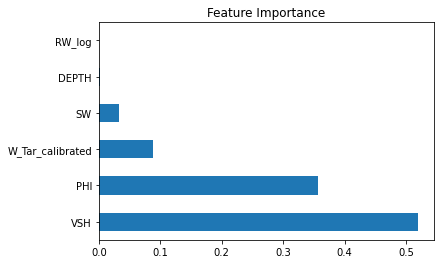

In [39]:
#### Random Forest (Bagging of multiple Decision Trees)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier instance with suitable parameters
ClfModel = RandomForestClassifier(max_depth=3, n_estimators=100,criterion='entropy',random_state=22)
# Tip: Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(ClfModel)

# Creating the model on Training Data
RF=ClfModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('Accuracy score for training data:',metrics.accuracy_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Putting predicted values along with the predictors and actual target values
TestDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestDataResults[TargetVariable]=y_test
TestDataResults[('Predicted_'+TargetVariable)]=prediction
TestDataResults['SitID']=X_test_wellnames

# Calculating accuracy for Test Data
print('\nAccuracy score for testing data:',metrics.accuracy_score(TestDataResults[TargetVariable],
                                                                 TestDataResults['Predicted_'+TargetVariable]))

# Calculating accuray for each class in Test Data
print('\nAccuracy score for each class in testing data:')

for lithology_class in TestDataResults[TargetVariable].unique():
    print('Accuracy score for lithology label ',lithology_class,' is ',
                  metrics.accuracy_score(TestDataResults[TestDataResults[TargetVariable]==lithology_class][TargetVariable],
                                TestDataResults[TestDataResults[TargetVariable]==lithology_class]['Predicted_'+TargetVariable]))

In [40]:
#### Number of Values predicted for each lithology
TestDataResults['Predicted_Lith_id_new'].value_counts()

5    562
1    531
4    446
2    287
Name: Predicted_Lith_id_new, dtype: int64

The accuracy score for lithology class 3 comes out to be 0 if no class weights is given as input to the ML model. This is because the model could not learn when to predict the class label as 3 due to insufficient number of examples in the training dataset as compared to other class labels. So when we provide a higher weight to the class which is less represented in the training data, we are basically putting a high penalty on the model if it wrongly predicts that class. It is similar to punishing a child for a mistake and then the child will think ten times to do the same mistake again. Let's, re-run the above model with a higher class weight for class 3. 

RandomForestClassifier(class_weight={1: 1, 2: 1, 3: 4, 4: 1, 5: 1},
                       criterion='entropy', max_depth=3, random_state=22)
Accuracy score for training data: 0.9672554582886406

##### Model Validation and Accuracy Calculations ##########

Accuracy score for testing data: 0.9649507119386638

Accuracy score for each class in testing data:
Accuracy score for lithology label  4  is  0.9632352941176471
Accuracy score for lithology label  5  is  0.9876325088339223
Accuracy score for lithology label  2  is  1.0
Accuracy score for lithology label  1  is  0.9373881932021467
Accuracy score for lithology label  3  is  0.6111111111111112


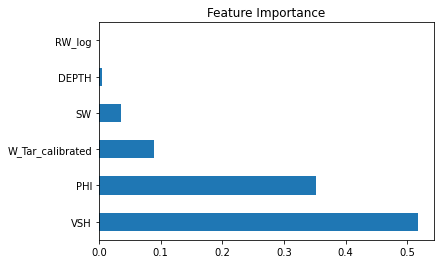

In [41]:
#### Random Forest (Bagging of multiple Decision Trees)

# Weights for different lithology class labels
lithology_class_weights={ 1 : 1, 
                          2 : 1, 
                          3 : 4,
                          4 : 1,
                          5 : 1}

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier instance with suitable parameters
ClfModel = RandomForestClassifier(max_depth=3, n_estimators=100,criterion='entropy',random_state=22,class_weight=lithology_class_weights)
# Tip: Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(ClfModel)

# Creating the model on Training Data
RF=ClfModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('Accuracy score for training data:',metrics.accuracy_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Putting predicted values along with the predictors and actual target values
TestDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestDataResults[TargetVariable]=y_test
TestDataResults[('Predicted_'+TargetVariable)]=prediction
TestDataResults['SitID']=X_test_wellnames

# Calculating accuracy for Test Data
print('\nAccuracy score for testing data:',metrics.accuracy_score(TestDataResults[TargetVariable],
                                                                 TestDataResults['Predicted_'+TargetVariable]))

# Calculating accuray for each class in Test Data
print('\nAccuracy score for each class in testing data:')

for lithology_class in TestDataResults[TargetVariable].unique():
    print('Accuracy score for lithology label ',lithology_class,' is ',
                  metrics.accuracy_score(TestDataResults[TestDataResults[TargetVariable]==lithology_class][TargetVariable],
                                TestDataResults[TestDataResults[TargetVariable]==lithology_class]['Predicted_'+TargetVariable]))

In [42]:
#### Number of Values predicted for each lithology
TestDataResults['Predicted_Lith_id_new'].value_counts()

5    562
1    525
4    424
2    287
3     28
Name: Predicted_Lith_id_new, dtype: int64

Save the test results so that you may explore and visualise it in excel, if you want, later on.

In [43]:
#### Saving Test data results
TestDataResults.to_csv("RF_TestDataResults.csv")
rf_testresults=TestDataResults.copy()

#### Plotting the Predicted Result

96+% Accuracy in Test data, well .... good results I must say. Let's see what it looks like in actual.

In [44]:
## Colors chosen for different facies from 1 to 5
facies_colors = ['#F4D03F','#DC7633','#1B4F72','#6E2C00','#AED6F1']

import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Function to compare actual and predicted facies
def compare_facies_plot(logs, compadre, facies_colors):
    ## make sure logs are sorted by depth
    logs = logs.sort_values(by='DEPTH')
    
    ## mapping colors to colormap 
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ## Finding min and max depth for plotting logs
    ztop=logs.DEPTH.min(); zbot=logs.DEPTH.max()
    
    ## To plot horizontal bars, repeating each value 100 times 
    cluster1 = np.repeat(np.expand_dims(logs['Lith_id_new'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)
    
    ## Making subplots and plotting data for each log in each subplot
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 12))
    ax[0].plot(logs.SW, logs.DEPTH, '-b')
    ax[1].plot(logs['RW_log'], logs.DEPTH, '-')
    ax[2].plot(logs.PHI, logs.DEPTH, '-', color='r')
    ax[3].plot(logs.VSH, logs.DEPTH, '-', color='black')
    im1 = ax[4].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=5)
    im2 = ax[5].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=5)
    
    ## Making axes for cololorbar in the last axes
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="15%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((30*' ').join([' Sand ', 'ShalySand', 'Other', 
                                'Shale', ' Coal ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    ## Inverting y-axis for all logs
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ## Setting xlabel for all logs and the min-max ticks on x-axis for each log
    ax[0].set_xlabel("SW")
    ax[0].set_xlim(logs.SW.min()-0.2,logs.SW.max()+0.2)
    ax[1].set_xlabel("RW_log")
    ax[1].set_xlim(logs.RW_log.min()-0.05,logs.RW_log.max()+0.05)
    ax[2].set_xlabel("PHI")
    ax[2].set_xlim(logs.PHI.min()-0.1,logs.PHI.max()+0.1)
    ax[3].set_xlabel("VSH")
    ax[3].set_xlim(logs.VSH.min()-0.1,logs.VSH.max()+0.1)
    ax[4].set_xlabel('Facies')
    ax[5].set_xlabel('Predicted Facies')
    
    ## Setting yticks for all logs
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[4].set_xticklabels([])
    ax[5].set_xticklabels([])
    
    ## Setting title of the plots
    f.suptitle('Well: %s'%logs.iloc[0]['SitID'], fontsize=14, y=0.94)

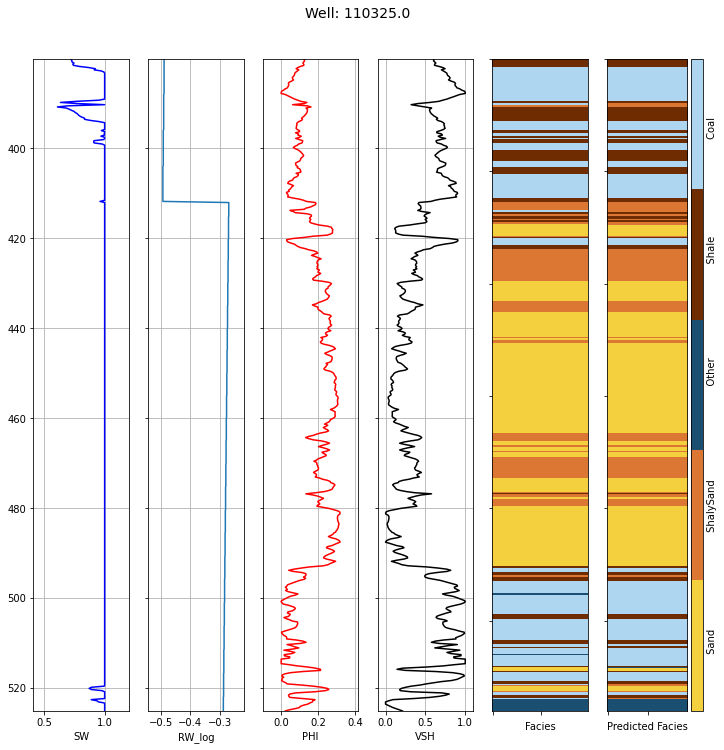

In [45]:
#### Visualising the predicted facies log
compare_facies_plot(TestDataResults[rf_testresults['SitID']==test_wells[0]],'Predicted_'+TargetVariable,facies_colors)

Fantastic, the model predicted lithology seems perfect. Now let's try another model just for the sake of practice and who knows if by chance, we get a better accuracy than this. Generally, boosting algorithm works much better than bagging algorithms.

## XG-Boost

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=22, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[16:52:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score for training data: 0.9850991315179406

#####

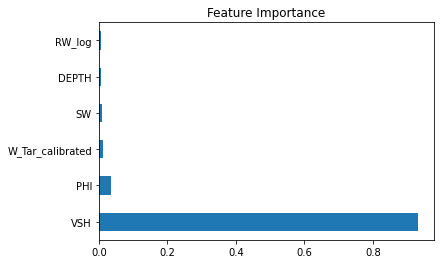

In [46]:
import xgboost as xgb

# create XGBoost instance with default hyper-parameters
ClfModel = xgb.XGBClassifier(random_state=22)

# Printing all the parameters of Random Forest
print(ClfModel)

# Creating the model on Training Data
XGB=ClfModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('Accuracy score for training data:',metrics.accuracy_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Putting predicted values along with the predictors and actual target values
TestDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestDataResults[TargetVariable]=y_test
TestDataResults[('Predicted_'+TargetVariable)]=prediction
TestDataResults['SitID']=X_test_wellnames

# Calculating accuracy for Test Data
print('\nAccuracy score for testing data:',metrics.accuracy_score(TestDataResults[TargetVariable],
                                                                 TestDataResults['Predicted_'+TargetVariable]))

# Calculating accuray for each class in Test Data
print('\nAccuracy score for each class in testing data:')

for lithology_class in TestDataResults[TargetVariable].unique():
    print('Accuracy score for lithology label ',lithology_class,' is ',
                  metrics.accuracy_score(TestDataResults[TestDataResults[TargetVariable]==lithology_class][TargetVariable],
                                TestDataResults[TestDataResults[TargetVariable]==lithology_class]['Predicted_'+TargetVariable]))

Save the results if you want to further do some analysis on the predictions 

In [47]:
#### Saving Test data results
TestDataResults.to_csv("XGB_TestDataResults.csv")
xgb_testresults=TestDataResults.copy()

~98.5% Accuracy .... Definietly beyond expectations and that too without class weights.  

#### Plotting the Predicted Result

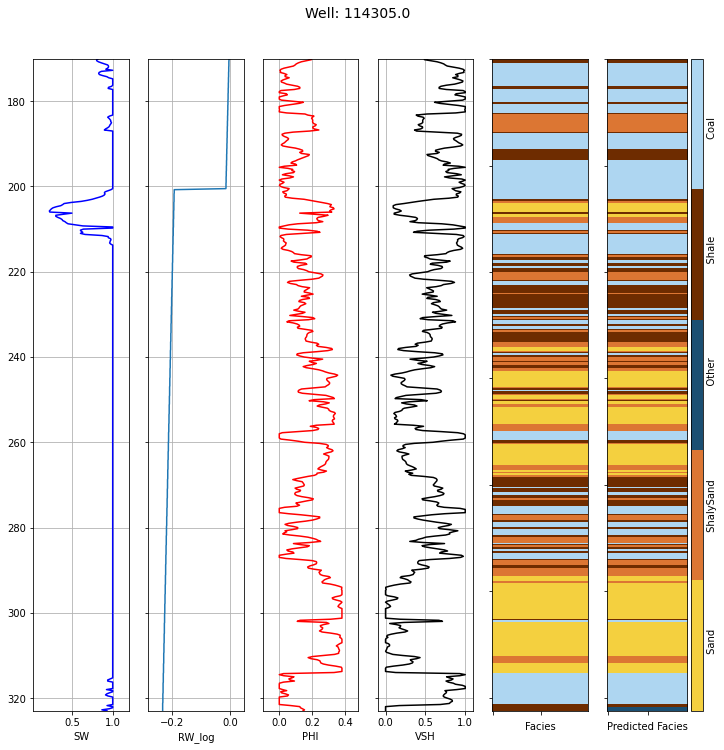

In [48]:
#### Visualising the predicted facies log
compare_facies_plot(TestDataResults[xgb_testresults['SitID']==test_wells[2]],'Predicted_'+TargetVariable,facies_colors)

## <a id='14'> Selection of Best ML Algorithm </a>

After trying different ML algorithms, now we can choose the algorithm that gives the best accuracy in classifying facies. That's why we will finally go ahead with XG-Boost as the final model.

In order to deply a model, we have to do three steps:
1.  Re-train the model using 100% data available 
2.  Save the model as a serialized file, so that it can be stored and used anywhere
3.  Create a python function which gets integrated with front-end (Java Website/ C# based Web-App) to take all the inputs and returns the prediction.

<b> Choosing most important variables only</b>
    
Note: Its recommended to keep lesser number of predictors for the model while deploying it in production. The lesser predictors we keep, the more stable will be the model due to less dependency. This is important specially when the data is high dimensional(too many predictor columns).

In this case, the most important predictor variables are 'VSH', 'PHI',and 'W_Tar_calibrated' for almost all algorithms.

Therefore, we will choose these as final set of predictor variables.

## <a id='15'>Deployment of the ML Model</a>

In [49]:
TargetVariable='Lith_id_new'
Predictors=['W_Tar_calibrated', 'SW', 'VSH', 'PHI']

X=well_log_df[Predictors]
y=well_log_df[TargetVariable]

#### Step 1. Retrain the model with 100% data

In [50]:
# Training the mClfModell on whole dataset
Final_XGB_Model=ClfModel.fit(X,y)

[16:56:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


#### Step 2. Save the model using Pickle Library

In [51]:
# Saving the Python objects as serialized files can be done using pickle library
import pickle

# Here let us save the Final model as .pkl file
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

#### Step 3. Python function for Prediction

In [52]:
##### This Function can be called from any from any front end tool/website
import pandas as pd
import pickle
def PredictResult(InputData):
    
    ## Maintaining the same order of columns as it was during the model training
    Predictors=['W_Tar_calibrated', 'SW', 'VSH', 'PHI']
    
    ## Making sure the input data has same columns as it was used for training the model
    if(InputData.shape[1]>=len(Predictors)):
        
        ## Any changes/transformations that you made in the training dataset for outlier removal or missing value treatment
        ## Since, we are not using 'RW_log', we don't need to take log of 'RW' and fill missing values
        ## but we need to make 'W_Tar_calibrated' from 'W_Tar'
        InputData['W_Tar_calibrated']=InputData['W_Tar']+2
        InputData['W_Tar_calibrated']=InputData['W_Tar_calibrated'].where(well_log_df['W_Tar_calibrated']>=1.9,1.9)
    
        # Convert categorical variables to numeric by label encoding, the same was as done in training
            
        
        # Generating the input values to the model
        X=InputData[Predictors]
        
        ##If standardization/normalization was done,re-fit the scaler with new predictors, and use it to transform new input
        #InputData=PredictorScalerFit.transform(InputData)
    
    
        ## Loading the trained-model from pickle file
        with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
            PredictionModel=pickle.load(fileReadStream)
            # Don't forget to close the filestream!
            fileReadStream.close()
            
        ## Predict the facies
        Prediction=PredictionModel.predict(X)
        X['Prediction']=Prediction
        return(X)
    
    else:
        raise Exception('Insufficient information to predict.')

The above function can be used for batch prediction where the input is a dataframe. We can also have a function which takes simply single set of values or array of values as input and produce the output in json format like an API.

#### Python API to be used for web-service

In [53]:
from numbers import Real
def PredictAPI(W_Tar,SW,VSH,PHI):
    # Creating a data frame for the model input
    if all(isinstance(var, list) for var in [W_Tar,SW,VSH,PHI]):
        InputData=pd.DataFrame(data={'W_Tar':W_Tar,'SW':SW,'VSH':VSH,'PHI':PHI})
    elif all(isinstance(var, Real) for var in [W_Tar,SW,VSH,PHI]):
        InputData=pd.DataFrame(data=[[W_Tar, SW, VSH,PHI]],columns=['W_Tar', 'SW', 'VSH', 'PHI'])
    else:
        raise Exception('Data type of all inputs is not matching.')
        
    # Calling the function defined above using the input parameters
    Predictions=PredictResult(InputData= InputData)

    # Returning the predicted facies
    return(Predictions.to_json())

In [54]:
## Let's test the build PredictAPI 
PredictAPI([-0.4,-0.9],[1.0,1.0],[0.55,0.2],[0.1,0.05])

'{"W_Tar_calibrated":{"0":1.6,"1":1.1},"SW":{"0":1.0,"1":1.0},"VSH":{"0":0.55,"1":0.2},"PHI":{"0":0.1,"1":0.05},"Prediction":{"0":4,"1":3}}'

To deploy the above build API as web service, Django and Flask are two most popular ways. We can then call our predictive model from a URL from any front end like java or angular js.

#### Flask API to host the predictive model as a web service

In [55]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/flask_prediction_api', methods=["GET"])
def flask_prediction_api():
    try:
        # Getting the paramters from API call
        W_Tar=float(request.args.get('W_Tar'))
        SW=float(request.args.get('SW'))
        VSH=float(request.args.get('VSH'))
        PHI=float(request.args.get('PHI'))
                
        # Calling the funtion to get predictions
        prediction_from_api=PredictAPI(
                                                       W_Tar=W_Tar, 
                                                       SW=SW, 
                                                       VSH=VSH,
                                                       PHI=PHI
                                                        )

        return (prediction_from_api)
    
    except Exception as e:
        return('Oops!:'+str(e))

In [56]:
if __name__ =="__main__":
    
    ## Host the API in localhost @ port 7570
    app.run(host='127.0.0.1', port=7570, threaded=True, debug=True, use_reloader=False)
    ## Interrupt kernel to stop the API

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:7570/ (Press CTRL+C to quit)
127.0.0.1 - - [02/Sep/2021 17:01:32] "GET /flask_prediction_api?W_Tar=-1.0&SW=0.95&VSH=0.21&PHI=0.3 HTTP/1.1" 200 -
127.0.0.1 - - [02/Sep/2021 17:01:32] "GET /favicon.ico HTTP/1.1" 404 -


#### Sample URL to call the API

Copy and paste the below URL in any web browser
http://127.0.0.1:7570/flask_prediction_api?W_Tar=-1.0&SW=0.95&VSH=0.21&PHI=0.3

A similar URL can be called from any front end web application with desired value of parameters and the prediction will be generated.